# Regression between sea level height and the timmerman wind data regions for cmip6 data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [61]:
%load_ext autoreload
%autoreload 2

from code import import_data as imprt
from code import regression as regres
from code import figures as figs

data_type = 'historical'
model = 'Timmerman'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import and plot cmip6 sea level data (zos) historical

In [62]:
# Open data file
zos = imprt.import_cmip6_slh_data()

#### Import and plot nearby wind data

In [63]:
wind_data = imprt.import_cmip6_wind_data(model = model, data_type = data_type)

### Select same models for both variables

In [64]:
# Only use models occuring in both datasets
models = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'BCC-ESM1',
       'CAMS-CSM1-0', 'CAS-ESM2-0', 'CMCC-CM2-SR5', 'CMCC-ESM2',
       'CNRM-CM6-1', 'CNRM-ESM2-1', 'CanESM5', 'CanESM5-CanOE',
       'EC-Earth3', 'EC-Earth3-AerChem', 'EC-Earth3-CC', 'EC-Earth3-Veg',
       'EC-Earth3-Veg-LR', 'FGOALS-f3-L', 'GFDL-CM4', 'GFDL-ESM4',
       'GISS-E2-1-G', 'GISS-E2-1-H', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM',
       'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'MIROC-ES2L', 'MIROC6',
       'MPI-ESM-1-2-HAM', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0',
       'NESM3', 'NorCPM1', 'UKESM1-0-LL']
zos = zos.where(zos.model.isin(models), drop=True)
wind_data = wind_data.where(wind_data.model.isin(models), drop=True)

### Plot data

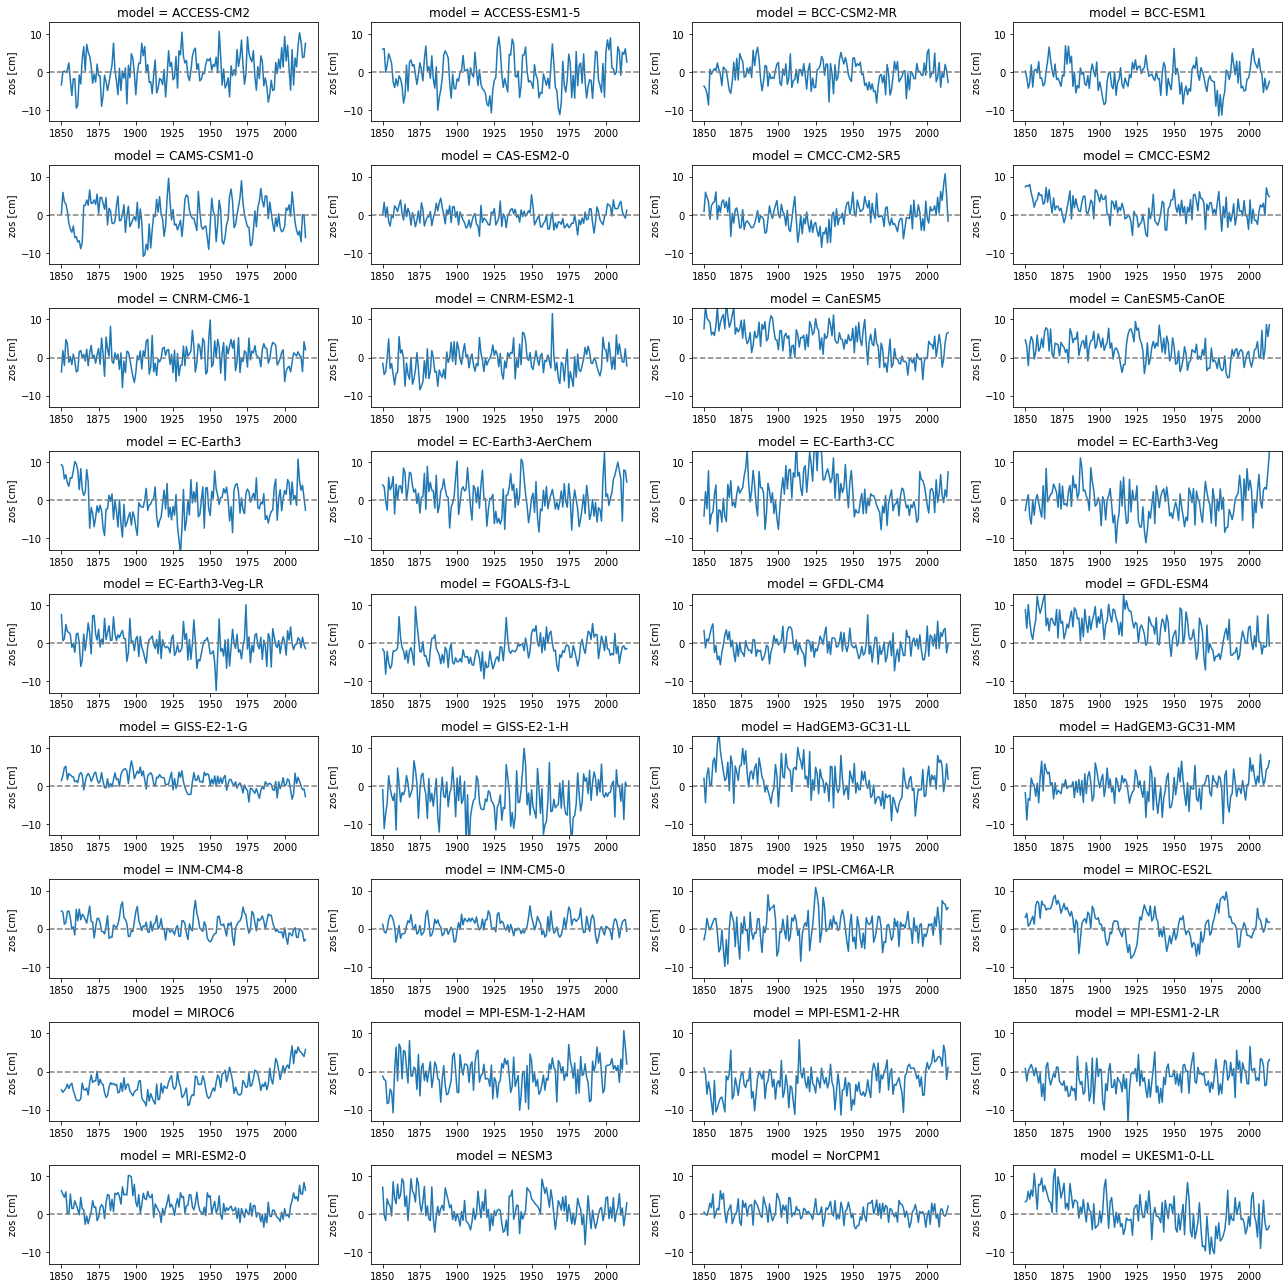

In [65]:
figs.plot_zos_data_per_model(zos, data_type)

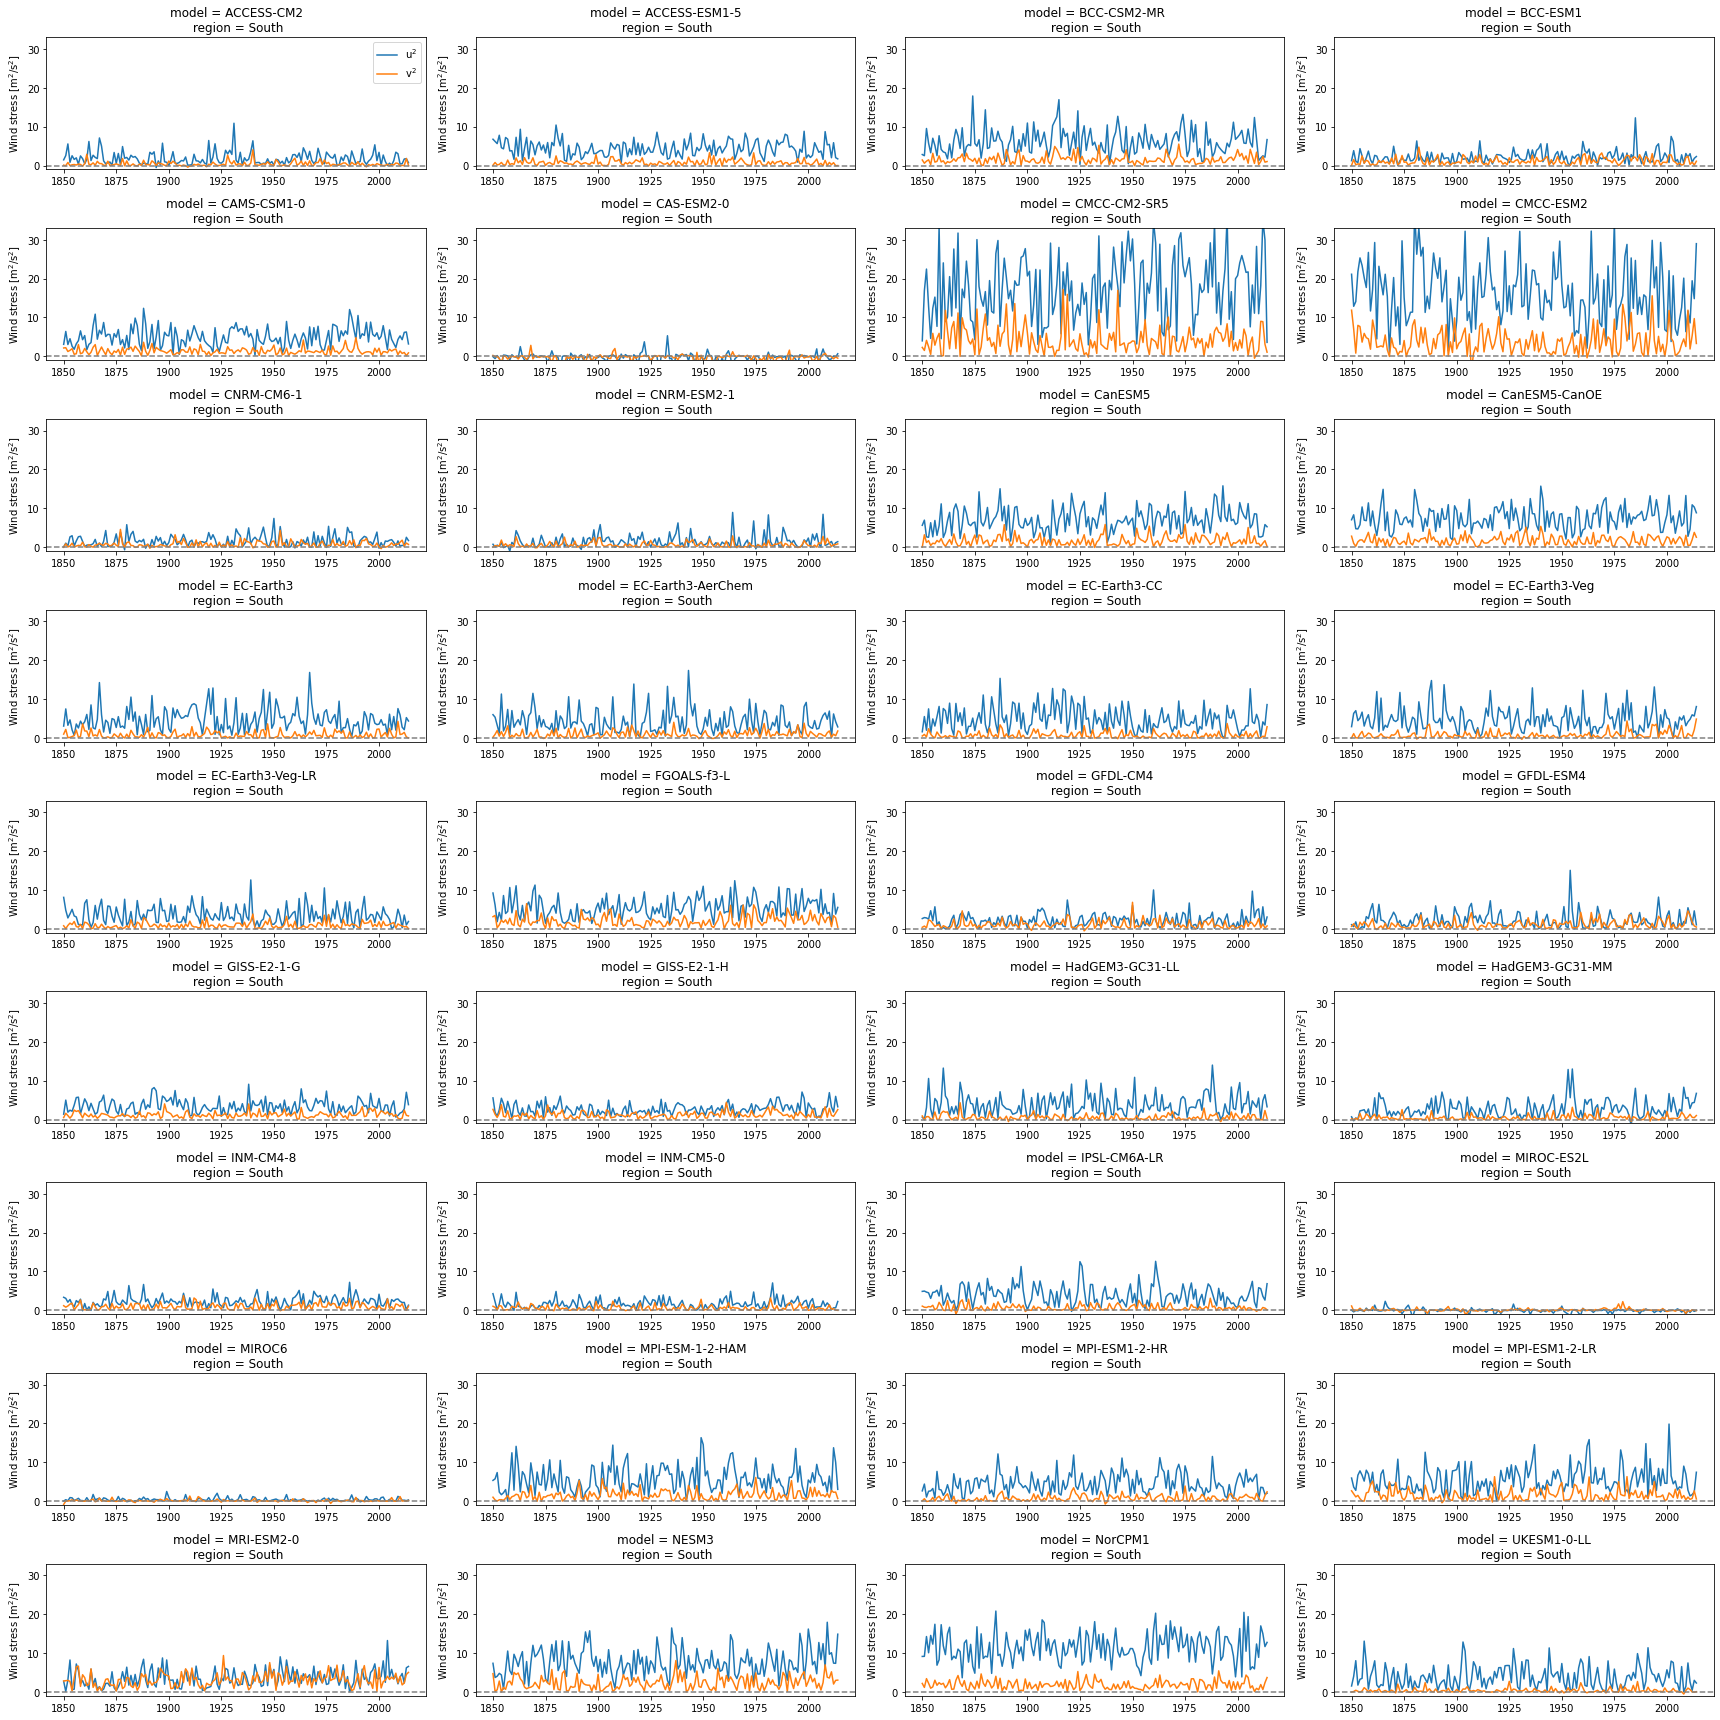

In [66]:
figs.plot_cmip6_wind_data_per_model(wind_data, model, data_type)

### Perform regression

In [67]:
results, timeseries, significance = regres.regression_cmip6(wind_data, zos, wind_model = model, data_type = data_type)

In [68]:
results.sel(station='Average').to_dataframe().drop('station', axis=1)

r2   r2_wind     r2_u2     r2_v2      rmse  constant  \
model                                                                           
ACCESS-CM2         0.429591  0.363814  0.316024  0.031919  3.163080  0.554949   
ACCESS-ESM1-5      0.392584  0.393804  0.371706  0.012972  3.472915 -0.587131   
BCC-CSM2-MR        0.261353  0.269417  0.145165  0.079450  2.583351 -0.532036   
BCC-ESM1           0.202501  0.205473  0.107317  0.060261  2.982319 -1.361083   
CAMS-CSM1-0        0.200197  0.201554  0.191445  0.000000  3.697257 -0.682635   
CAS-ESM2-0         0.231081  0.226706  0.226602  0.000000  1.852905 -0.475207   
CMCC-CM2-SR5       0.386061  0.395020  0.280480  0.059913  2.500083 -0.241261   
CMCC-ESM2          0.383050  0.340048  0.196460  0.157969  2.327322  1.702166   
CNRM-CM6-1         0.693686  0.696946  0.394124  0.351276  1.711635  0.279982   
CNRM-ESM2-1        0.700475  0.695393  0.433550  0.387191  1.842812 -1.052144   
CanESM5            0.656884  0.148694  0.092938  0.110585  2.350004  4.606703   
CanESM5-CanOE      0.507443  0.344267  0.230107  0.167301  2.262857  2.082527   
EC-Earth3          0.381385  0.385194  0.214103  0.229151  3.598060 -0.381436   
EC-Earth3-AerChem  0.587272  0.581754  0.512253  0.192199  2.741738  1.105815   
EC-Earth3-CC       0.509182  0.513226  0.454962  0.184774  3.486373  2.030744   
EC-Earth3-Veg      0.608448  0.611987  0.497452  0.334279  2.673611 -0.348534   
EC-Earth3-Veg-LR   0.611119  0.582074  0.489116  0.133481  2.001117 -0.018490   
FGOALS-f3-L        0.159678  0.138448  0.127166  0.000000  2.807123 -1.858093   
GFDL-CM4           0.542796  0.549309  0.525456  0.000000  1.781087 -0.582775   
GFDL-ESM4          0.740336  0.404927  0.308828  0.094122  2.111618  3.568200   
GISS-E2-1-G        0.511371  0.303649  0.124473  0.163914  1.346811  1.208327   
GISS-E2-1-H        0.107449  0.109635  0.094692  0.017227  4.454966 -2.755304   
HadGEM3-GC31-LL    0.578556  0.430781  0.352561  0.189659  2.723406  1.522214   
HadGEM3-GC31-MM    0.685125  0.685166  0.644823  0.122267  1.889582 -0.077177   
INM-CM4-8          0.168724  0.074707  0.041431  0.013630  2.156611  0.836905   
INM-CM5-0          0.082281  0.021789  0.021789  0.000000  1.904803  0.716677   
IPSL-CM6A-LR       0.687011  0.640306  0.472115  0.261855  2.072975  0.228596   
MIROC-ES2L         0.214801  0.166136  0.137227  0.073054  3.393252  1.253351   
MIROC6             0.411108  0.093215  0.085416  0.000000  2.507377 -3.178364   
MPI-ESM-1-2-HAM    0.716981  0.719211  0.638959  0.220952  2.101105 -0.638020   
MPI-ESM1-2-HR      0.534646  0.390485  0.387971  0.000000  2.614077 -2.762595   
MPI-ESM1-2-LR      0.677643  0.659014  0.620512  0.092730  1.886289 -1.759544   
MRI-ESM2-0         0.411284  0.312385  0.193618  0.139151  2.036878  2.279104   
NESM3              0.579074  0.465912  0.328304  0.245792  2.241797  1.542901   
NorCPM1            0.698685  0.609158  0.567270  0.078345  1.146809  0.761042   
UKESM1-0-LL        0.679611  0.413965  0.347251  0.129337  2.600941  0.327024   

                   channel_u2  channel_v2  south_u2  south_v2  midwest_u2  \
model                                                                       
ACCESS-CM2          -0.000000   -0.000000 -0.000000 -0.000000    0.000000   
ACCESS-ESM1-5       -0.613553   -0.281141 -0.000000 -0.193992   -0.000000   
BCC-CSM2-MR          0.000000   -0.000000  0.000000 -0.000000    0.000000   
BCC-ESM1            -0.000000   -0.000000 -0.000000 -0.794058    0.000000   
CAMS-CSM1-0          0.000000    0.264554  0.000000  0.000000    0.000000   
CAS-ESM2-0           0.000000   -0.000000 -0.000000  0.000000   -0.000000   
CMCC-CM2-SR5         0.028222    0.246927  0.000000  0.000000    0.771905   
CMCC-ESM2            0.064578    0.714116  0.000000  0.000000    0.000000   
CNRM-CM6-1           0.034763    1.584288  0.714631 -0.000000    0.000000   
CNRM-ESM2-1          0.000000    1.828663  1.419585 -0.000000    0.000000   
CanESM5              0

In [69]:
timeseries

<xarray.Dataset>
Dimensions:       (model: 36, station: 7, time: 165)
Coordinates:
  * time          (time) int64 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014
  * station       (station) <U15 'Vlissingen' 'Hoek v. Holland' ... 'Average'
  * model         (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
Data variables:
    channel_u2    (model, station, time) float64 0.0 0.0 ... -0.1689 -0.3462
    channel_v2    (model, station, time) float64 0.0 0.0 ... -0.3526 -0.2294
    south_u2      (model, station, time) float64 0.0 -0.0 ... -0.1016 -0.1839
    south_v2      (model, station, time) float64 0.0 0.0 -0.0 ... -0.0 -0.0 -0.0
    midwest_u2    (model, station, time) float64 -0.0 0.0 0.0 ... -0.0 -0.0 -0.0
    midwest_v2    (model, station, time) float64 0.0 0.0 -0.0 ... -0.0 -0.0 -0.0
    mideast_u2    (model, station, time) float64 0.0 0.0 0.0 ... -0.6386 0.01064
    mideast_v2    (model, station, time) float64 0.3246 0.6728 ... 0.0 0.0
    northwest_u2  (model, station, time) float64 0.02419 1.009 ... -0.0 -0.0
    northwest_v2  (model, station, time) float64 -0.0 -0.0 ... -0.5666 -0.288
    northeast_u2  (model, station, time) float64 0.4427 2.044 ... -0.0 0.0
    northeast_v2  (model, station, time) float64 0.0 0.0 0.0 ... -0.0 -0.0 -0.0
    trend         (model, station, time) float64 -1.63 -1.61 ... -3.734 -3.78
    total         (model, station, time) float64 -0.8381 2.116 ... -5.562 -4.817
    wind_total    (model, station, time) float64 0.7915 3.726 ... -1.828 -1.037
    channel       (model, station, time) float64 0.0 0.0 0.0 ... -0.5215 -0.5756
    south         (model, station, time) float64 0.0 0.0 0.0 ... -0.1016 -0.1839
    midwest       (model, station, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    mideast       (model, station, time) float64 0.3246 0.6728 ... 0.01064
    northwest     (model, station, time) float64 0.02419 1.009 ... -0.288
    northeast     (model, station, time) float64 0.4427 2.044 0.7007 ... 0.0 0.0
    u2_total      (model, station, time) float64 0.4669 3.053 ... -0.5194
    v2_total      (model, station, time) float64 0.3246 0.6728 ... -0.5174

In [70]:
significance.sel(station='Average').to_dataframe().drop('station', axis=1)

Channel u$^2$  Channel v$^2$  South u$^2$  South v$^2$  \
model                                                                       
ACCESS-CM2                  True          False         True        False   
ACCESS-ESM1-5              False           True         True        False   
BCC-CSM2-MR                 True           True         True         True   
BCC-ESM1                   False           True        False         True   
CAMS-CSM1-0                 True           True         True         True   
CAS-ESM2-0                 False          False         True        False   
CMCC-CM2-SR5                True           True         True         True   
CMCC-ESM2                   True           True         True         True   
CNRM-CM6-1                  True           True         True         True   
CNRM-ESM2-1                 True           True         True         True   
CanESM5                     True           True         True         True   
CanESM5-CanOE               True           True         True         True   
EC-Earth3                   True           True         True         True   
EC-Earth3-AerChem           True           True         True         True   
EC-Earth3-CC                True           True         True         True   
EC-Earth3-Veg               True           True         True         True   
EC-Earth3-Veg-LR            True           True         True         True   
FGOALS-f3-L                 True           True         True        False   
GFDL-CM4                    True          False         True        False   
GFDL-ESM4                   True          False         True        False   
GISS-E2-1-G                 True          False         True        False   
GISS-E2-1-H                 True           True         True        False   
HadGEM3-GC31-LL             True           True         True         True   
HadGEM3-GC31-MM             True           True         True         True   
INM-CM4-8                  False          False         True        False   
INM-CM5-0                  False          False         True        False   
IPSL-CM6A-LR                True           True         True         True   
MIROC-ES2L                  True           True         True         True   
MIROC6                     False          False         True        False   
MPI-ESM-1-2-HAM             True           True         True         True   
MPI-ESM1-2-HR               True          False         True        False   
MPI-ESM1-2-LR               True           True         True         True   
MRI-ESM2-0                  True           True         True         True   
NESM3                       True           True         True         True   
NorCPM1                     True           True         True         True   
UKESM1-0-LL                 True           True         True         True   

                   Mid-West u$^2$  Mid-West v$^2$  Mid-East u$^2$  \
model                                                               
ACCESS-CM2                   True           False            True   
ACCESS-ESM1-5                True           False            True   
BCC-CSM2-MR                  True            True            True   
BCC-ESM1                     True            True            True   
CAMS-CSM1-0                  True           False            True   
CAS-ESM2-0                   True           False            True   
CMCC-CM2-SR5                 True            True            True   
CMCC-ESM2                    True            True            True   
CNRM-CM6-1                   True            True            True   
CNRM-ESM2-1                  True            True            True   
CanESM5                      True           False            True   
CanESM5-CanOE                True            True            True   
EC-Earth3                    True            True            True   
EC-Earth3-AerChem            True            True        

#### Plot regression results

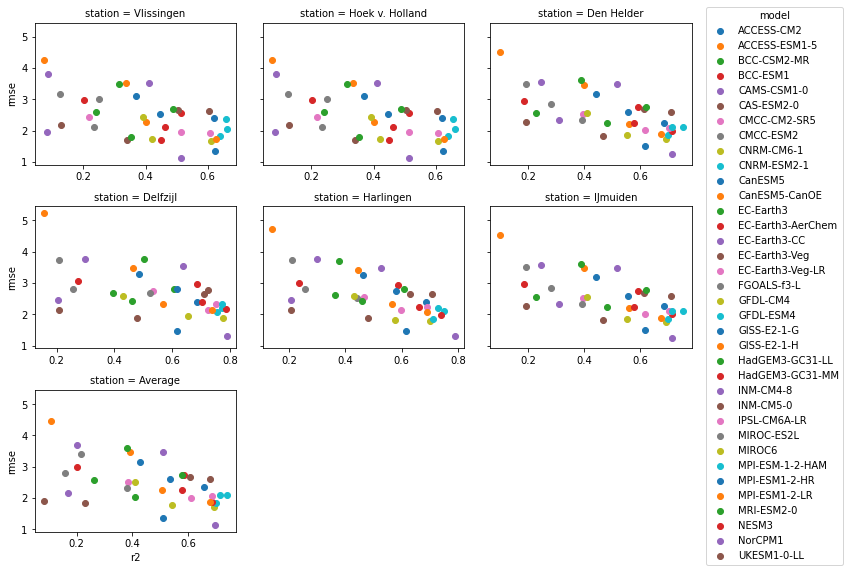

In [71]:
figs.plot_cmip6_two_variables(results, 'r2', 'rmse', data_type)

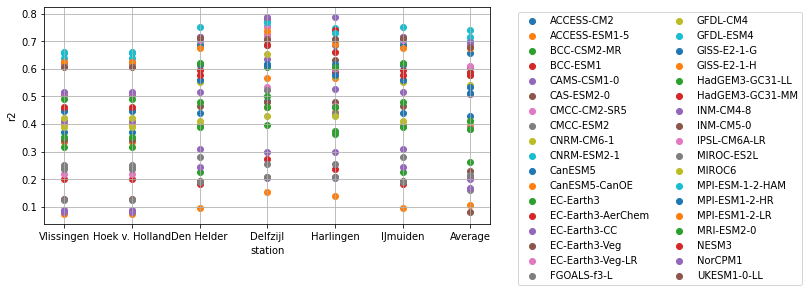

In [72]:
figs.plot_cmip6_result_per_station(results, 'r2', data_type)

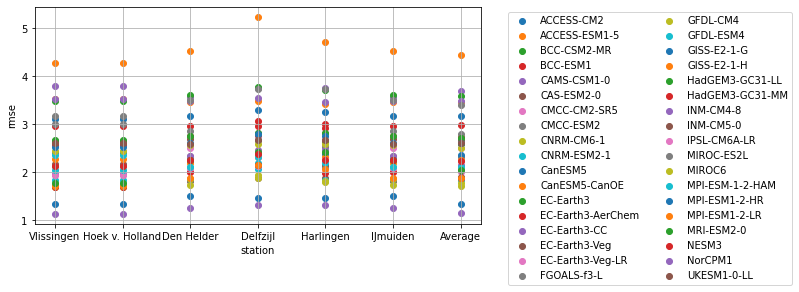

In [73]:
figs.plot_cmip6_result_per_station(results, 'rmse', data_type)

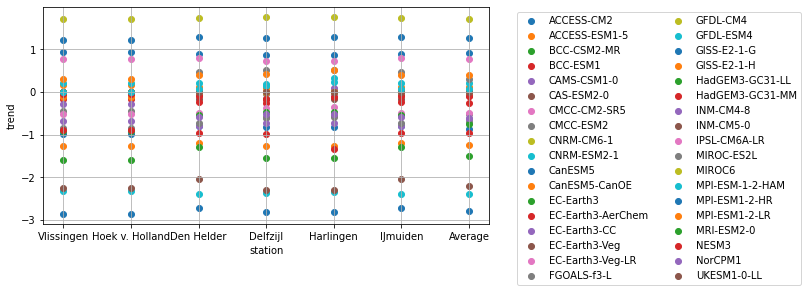

In [74]:
figs.plot_cmip6_result_per_station(results, 'trend', data_type)

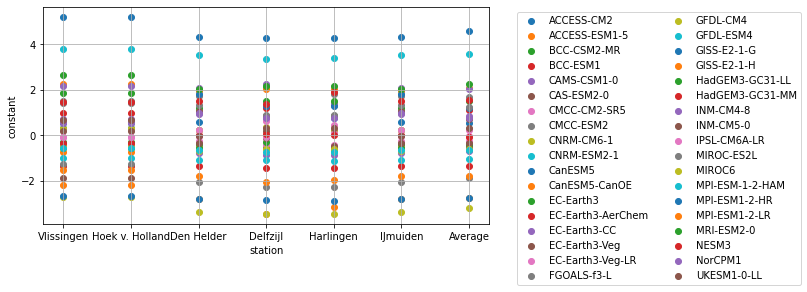

In [75]:
figs.plot_cmip6_result_per_station(results, 'constant', data_type)

In [76]:
timeseries

<xarray.Dataset>
Dimensions:       (model: 36, station: 7, time: 165)
Coordinates:
  * time          (time) int64 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014
  * station       (station) <U15 'Vlissingen' 'Hoek v. Holland' ... 'Average'
  * model         (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
Data variables:
    channel_u2    (model, station, time) float64 0.0 0.0 ... -0.1689 -0.3462
    channel_v2    (model, station, time) float64 0.0 0.0 ... -0.3526 -0.2294
    south_u2      (model, station, time) float64 0.0 -0.0 ... -0.1016 -0.1839
    south_v2      (model, station, time) float64 0.0 0.0 -0.0 ... -0.0 -0.0 -0.0
    midwest_u2    (model, station, time) float64 -0.0 0.0 0.0 ... -0.0 -0.0 -0.0
    midwest_v2    (model, station, time) float64 0.0 0.0 -0.0 ... -0.0 -0.0 -0.0
    mideast_u2    (model, station, time) float64 0.0 0.0 0.0 ... -0.6386 0.01064
    mideast_v2    (model, station, time) float64 0.3246 0.6728 ... 0.0 0.0
    northwest_u2  (model, station, time) float64 0.02419 1.009 ... -0.0 -0.0
    northwest_v2  (model, station, time) float64 -0.0 -0.0 ... -0.5666 -0.288
    northeast_u2  (model, station, time) float64 0.4427 2.044 ... -0.0 0.0
    northeast_v2  (model, station, time) float64 0.0 0.0 0.0 ... -0.0 -0.0 -0.0
    trend         (model, station, time) float64 -1.63 -1.61 ... -3.734 -3.78
    total         (model, station, time) float64 -0.8381 2.116 ... -5.562 -4.817
    wind_total    (model, station, time) float64 0.7915 3.726 ... -1.828 -1.037
    channel       (model, station, time) float64 0.0 0.0 0.0 ... -0.5215 -0.5756
    south         (model, station, time) float64 0.0 0.0 0.0 ... -0.1016 -0.1839
    midwest       (model, station, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    mideast       (model, station, time) float64 0.3246 0.6728 ... 0.01064
    northwest     (model, station, time) float64 0.02419 1.009 ... -0.288
    northeast     (model, station, time) float64 0.4427 2.044 0.7007 ... 0.0 0.0
    u2_total      (model, station, time) float64 0.4669 3.053 ... -0.5194
    v2_total      (model, station, time) float64 0.3246 0.6728 ... -0.5174

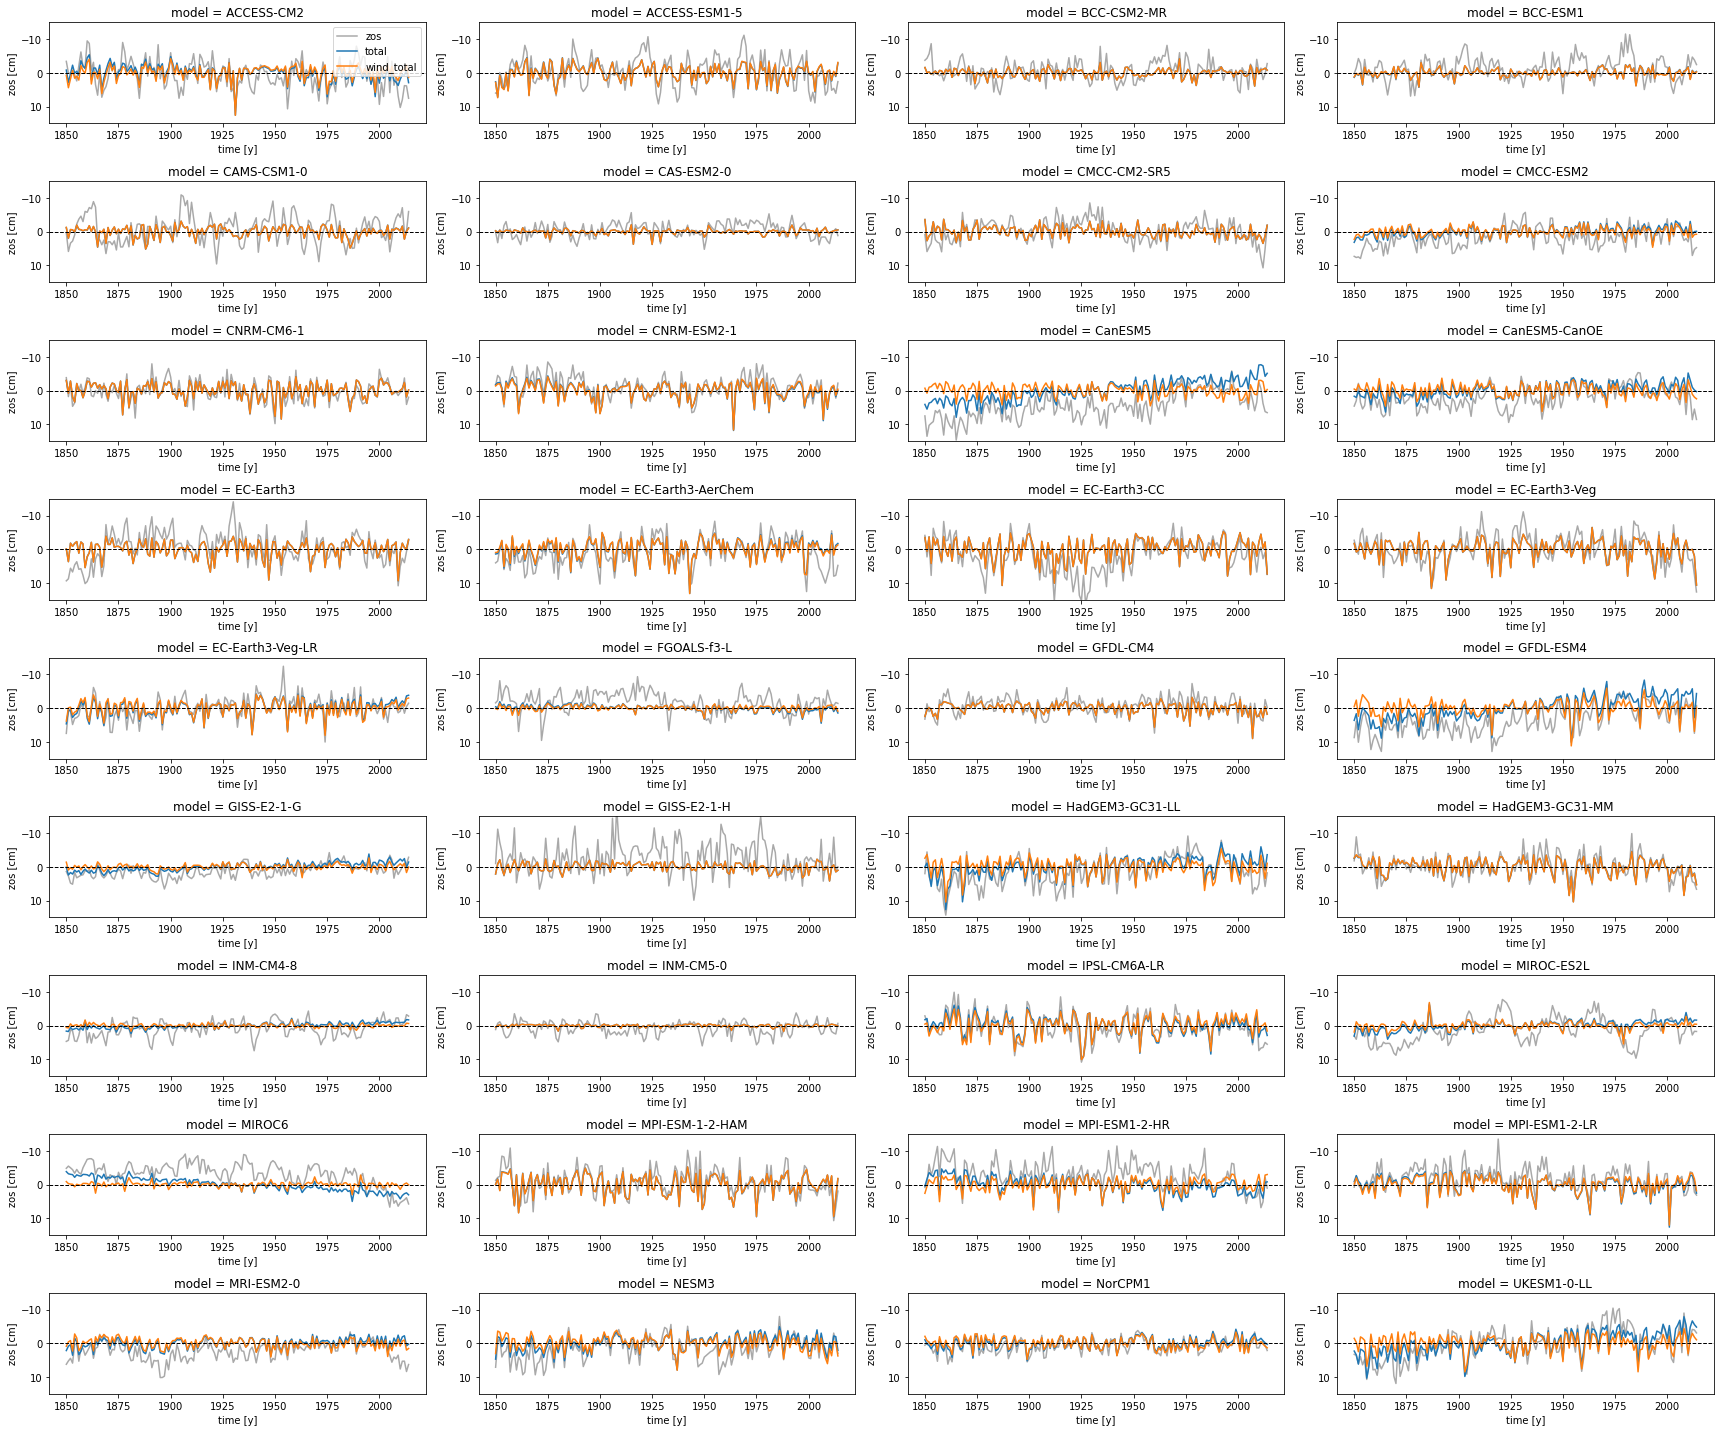

In [77]:
labels = ['total', 'wind_total']

figs.plot_zos_regression_result_per_model_one_station(zos, timeseries, labels, model)

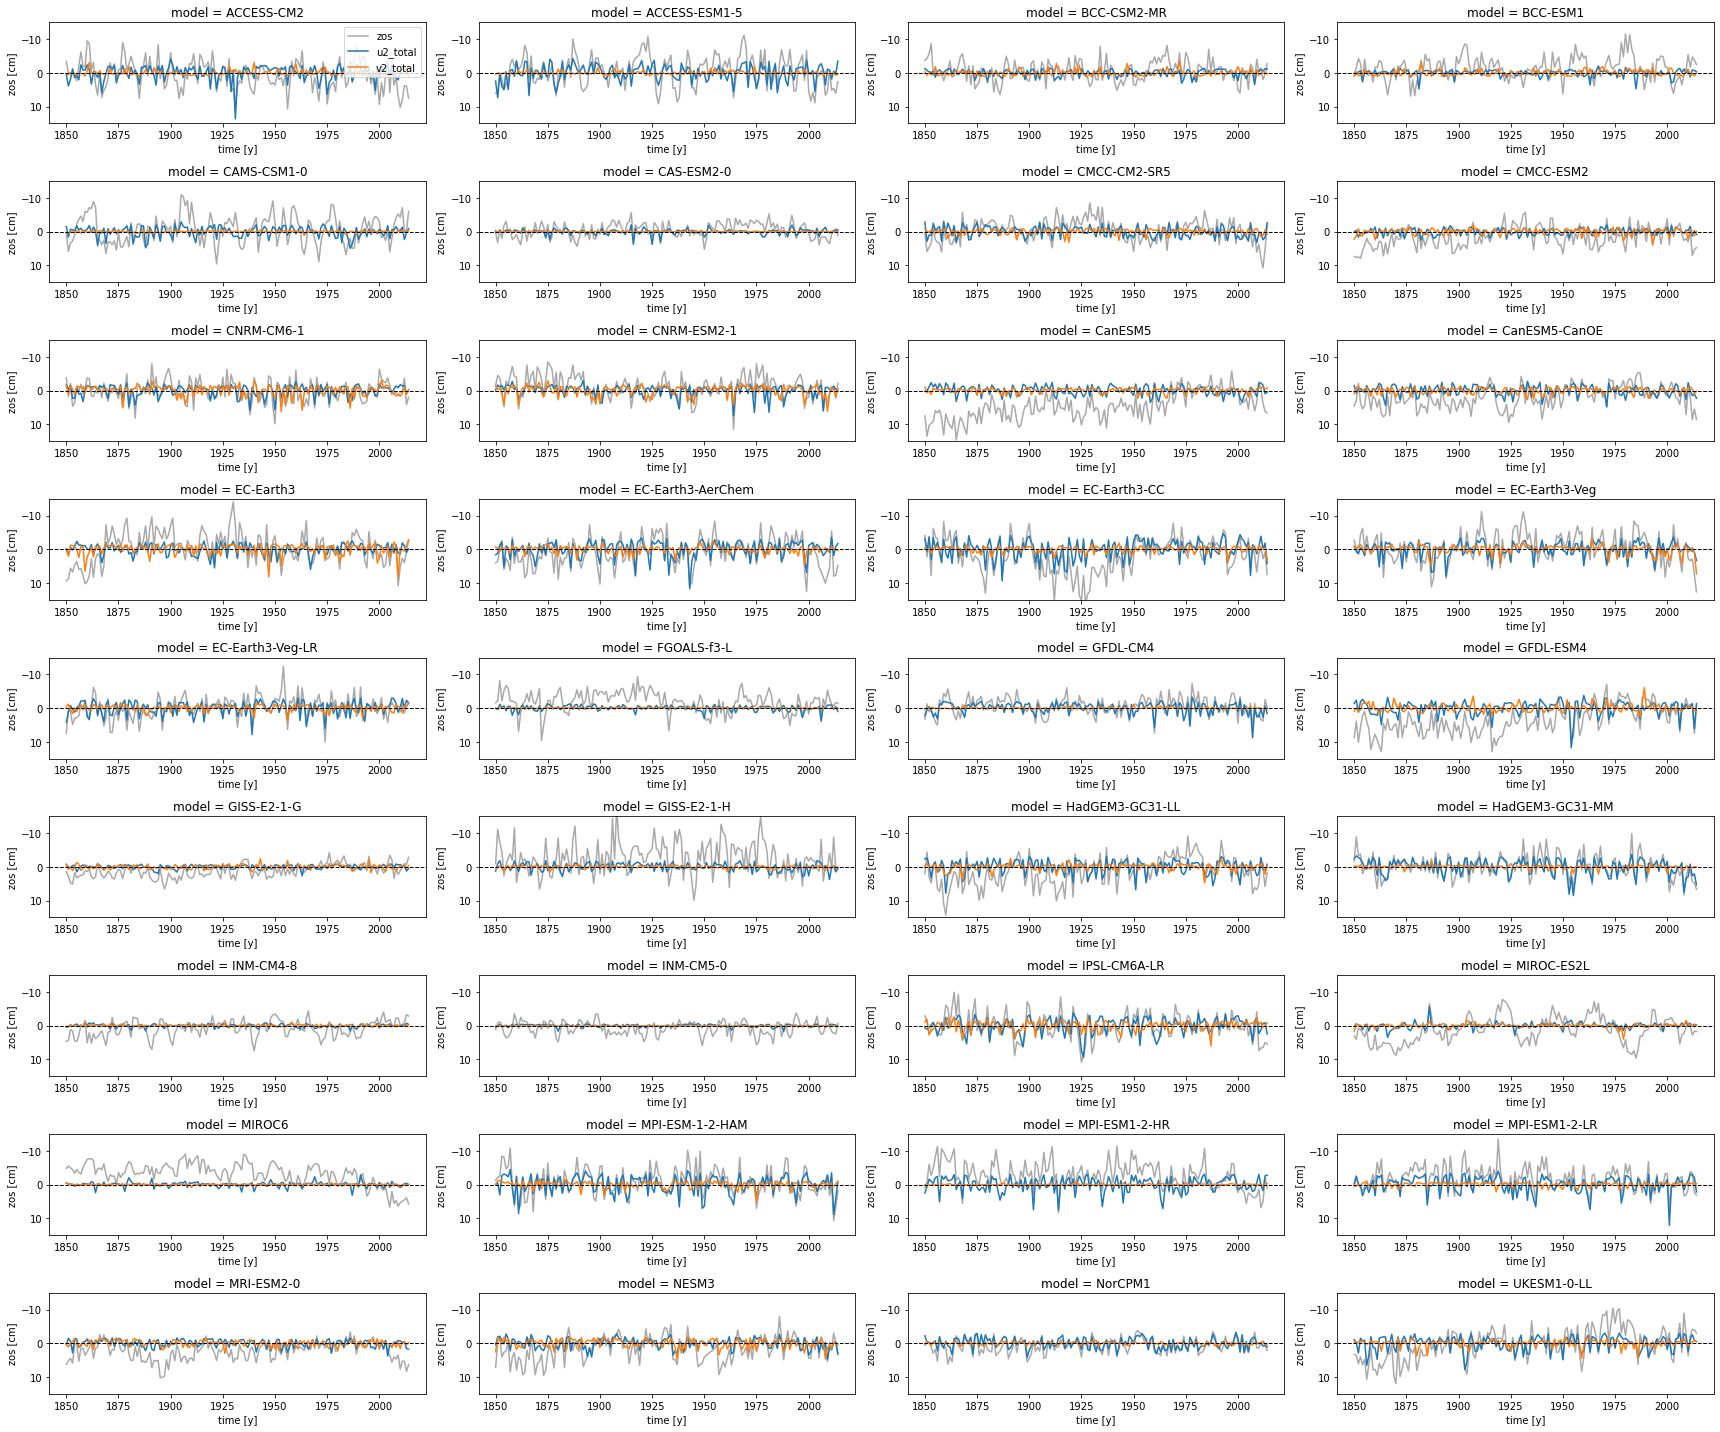

In [78]:
labels = ['u2_total', 'v2_total']

figs.plot_zos_regression_result_per_model_one_station(zos, timeseries, labels, model)

#### Plot trends

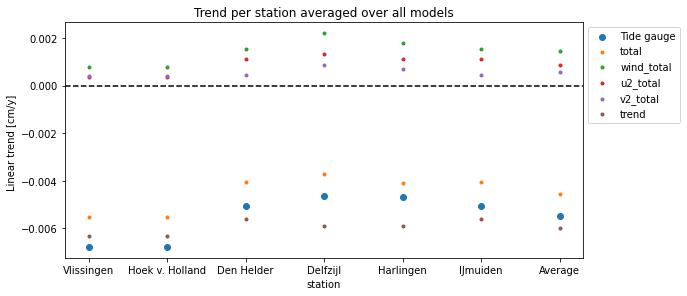

In [80]:
figs.plot_cmip6_trends_timeseries_per_station_model_averages(zos, timeseries, ['total', 'wind_total', 'u2_total', 'v2_total', 'trend'], model, data_type, errorbar = False)